# Spectrum Protect Summary Table Analysis

Created by: Robert Hartwig
Last edited:  November 24, 2020
Verison: 1.0

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Download a sample Spectrum Protect summary table from IBM Cloud bucket.

In [2]:
!wget -O summary.txt https://cp-protect-project.s3.us-east.cloud-object-storage.appdomain.cloud/summary.txt

--2020-11-25 03:25:45--  https://cp-protect-project.s3.us-east.cloud-object-storage.appdomain.cloud/summary.txt
Resolving cp-protect-project.s3.us-east.cloud-object-storage.appdomain.cloud (cp-protect-project.s3.us-east.cloud-object-storage.appdomain.cloud)... 169.63.118.98
Connecting to cp-protect-project.s3.us-east.cloud-object-storage.appdomain.cloud (cp-protect-project.s3.us-east.cloud-object-storage.appdomain.cloud)|169.63.118.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4569083 (4.4M) [application/octet-stream]
Saving to: ‘summary.txt’

100%[======================================>] 4,569,083    559KB/s   in 6.8s   

2020-11-25 03:25:52 (655 KB/s) - ‘summary.txt’ saved [4569083/4569083]



### Load the summary.txt file into a dataframe.  Skipping the first 9 rows of the summary.txt as it is just comments.

In [3]:
df = pd.read_csv('summary.txt', skiprows=9, header=None)

### Naming to the colums as using the following IBM Knowledge Center Spectrum Protect 7.1 page.

https://www.ibm.com/support/knowledgecenter/SSGSG7_7.1.0/com.ibm.itsm.srv.doc/t_sql_activity_summ_tbl_querying.html

In [4]:
df.columns = ["START_TIME:", "END_TIME:", "ACTIVITY:", "NUMBER:", "ENTITY:", "COMMMETH:", "ADDRESS:", "SCHEDULE_NAME:", "EXAMINED:", "AFFECTED:", "FAILED:", "BYTES:", "IDLE:", "MEDIAW:", "PROCESSES:", "SUCCESSFUL:", "VOLUME_NAME:", "DRIVE_NAME:", "LIBRARY_NAME:", "LAST_USE:", "COMM_WAIT:", "NUM_OFFSITE_VOLS:"]

### Get the number of rows and colums in the dataframe

In [5]:
df.shape

(35910, 22)

In [6]:
df.head()

,START_TIME:,END_TIME:,ACTIVITY:,NUMBER:,ENTITY:,COMMMETH:,ADDRESS:,SCHEDULE_NAME:,EXAMINED:,AFFECTED:,...,IDLE:,MEDIAW:,PROCESSES:,SUCCESSFUL:,VOLUME_NAME:,DRIVE_NAME:,LIBRARY_NAME:,LAST_USE:,COMM_WAIT:,NUM_OFFSITE_VOLS:
0,2016-11-13 06:27:13.000000,2016-11-13 06:27:13.000000,POOLPRIMUTILGB,1,TEST_BACKUP,NaN,NaN,NaN,0,0,...,0,0,0,YES,NaN,NaN,NaN,NaN,0.0,NaN
1,2016-11-13 07:00:32.000000,2016-11-13 07:59:50.000000,TAPE MOUNT,0,NaN,NaN,NaN,NaN,0,0,...,0,0,0,YES,C00890L5,DRIVE10 (/dev/TDRIVE-R10),3584LIB,Data,0.0,NaN
2,2016-11-13 07:00:07.000000,2016-11-13 07:55:58.000000,STGPOOL BACKUP,4616,VE_BKPOOL -> COPYPOOL_LTO5,NaN,NaN,MAINTENANCE,23938,23938,...,0,28,1,YES,NaN,NaN,NaN,NaN,0.0,NaN
3,2016-11-13 08:35:14.000000,2016-11-13 08:35:14.000000,POOLPRIMUTILGB,1,TEST_ARCHIVE,NaN,NaN,NaN,0,0,...,0,0,0,YES,NaN,NaN,NaN,NaN,0.0,NaN
4,2016-11-13 07:31:13.000000,2016-11-13 07:31:13.000000,POOLPRIMUTILGB,1,NHS_ARCHIVE_PRIMARY,NaN,NaN,NaN,0,0,...,0,0,0,YES,NaN,NaN,NaN,NaN,0.0,NaN


In [7]:
list(df.columns)

['START_TIME:',
 'END_TIME:',
 'ACTIVITY:',
 'NUMBER:',
 'ENTITY:',
 'COMMMETH:',
 'ADDRESS:',
 'SCHEDULE_NAME:',
 'EXAMINED:',
 'AFFECTED:',
 'FAILED:',
 'BYTES:',
 'IDLE:',
 'MEDIAW:',
 'PROCESSES:',
 'SUCCESSFUL:',
 'VOLUME_NAME:',
 'DRIVE_NAME:',
 'LIBRARY_NAME:',
 'LAST_USE:',
 'COMM_WAIT:',
 'NUM_OFFSITE_VOLS:']

### Convert the START_TIME and END_TIME from string to datetime format

In [8]:
df['START_TIME:'].astype('datetime64')

0       2016-11-13 06:27:13
1       2016-11-13 07:00:32
2       2016-11-13 07:00:07
3       2016-11-13 08:35:14
4       2016-11-13 07:31:13
5       2016-11-13 07:00:07
6       2016-11-13 08:35:14
7       2016-11-13 08:35:14
8       2016-11-13 07:31:13
9       2016-11-13 07:31:13
10      2016-11-13 08:35:14
11      2016-11-13 08:35:14
12      2016-11-13 07:31:13
13      2016-11-13 08:35:14
14      2016-11-13 07:31:13
15      2016-11-13 07:31:13
16      2016-11-13 08:35:14
17      2016-11-13 08:35:14
18      2016-11-13 07:31:13
19      2016-11-13 08:35:14
20      2016-11-13 08:35:14
21      2016-11-13 07:31:13
22      2016-11-13 08:35:14
23      2016-11-13 07:31:13
24      2016-11-13 07:31:13
25      2016-11-13 08:35:14
26      2016-11-13 07:31:13
27      2016-11-13 07:24:38
28      2016-11-13 07:24:34
29      2016-11-13 07:27:52
                ...        
35880   2016-12-06 15:49:17
35881   2016-12-06 15:37:07
35882   2016-12-06 15:49:28
35883   2016-12-06 15:49:39
35884   2016-12-06 1

### Format the END_TIME field

In [9]:
df['END_TIME:'].astype('datetime64')

0       2016-11-13 06:27:13
1       2016-11-13 07:59:50
2       2016-11-13 07:55:58
3       2016-11-13 08:35:14
4       2016-11-13 07:31:13
5       2016-11-13 07:55:58
6       2016-11-13 08:35:14
7       2016-11-13 08:35:14
8       2016-11-13 07:31:13
9       2016-11-13 07:31:13
10      2016-11-13 08:35:14
11      2016-11-13 08:35:14
12      2016-11-13 07:31:13
13      2016-11-13 08:35:14
14      2016-11-13 07:31:13
15      2016-11-13 07:31:13
16      2016-11-13 08:35:14
17      2016-11-13 08:35:14
18      2016-11-13 07:31:13
19      2016-11-13 08:35:14
20      2016-11-13 08:35:14
21      2016-11-13 07:31:13
22      2016-11-13 08:35:14
23      2016-11-13 07:31:13
24      2016-11-13 07:31:13
25      2016-11-13 08:35:14
26      2016-11-13 07:31:13
27      2016-11-13 07:30:22
28      2016-11-13 07:30:04
29      2016-11-13 07:27:53
                ...        
35880   2016-12-06 15:49:18
35881   2016-12-06 15:37:07
35882   2016-12-06 15:49:29
35883   2016-12-06 15:49:40
35884   2016-12-06 1

### Making sure the BYTES column is an integer so to calculate the sum of the daily bytes

In [10]:
df['BYTES:'].astype('int64')

0                   0
1                   0
2        218545831936
3                   0
4                 110
5                   0
6                 110
7                  16
8                7110
9                 110
10                  0
11                  0
12                  0
13                  0
14                  0
15                 16
16                  0
17             265069
18             271776
19             272317
20               7110
21               1395
22               1395
23                  0
24              68335
25                  0
26              69476
27                  0
28                  0
29                  0
             ...     
35880         5821594
35881               0
35882         5476720
35883        13192514
35884        13940478
35885          274548
35886           69476
35887           68336
35888               0
35889               0
35890              45
35891          276962
35892               0
35893               0
35894     

### Use the Pandas dt.normalize to format the date & time to calculate daily sums

In [11]:
df['START_TIME:'] = pd.to_datetime(df['START_TIME:']).dt.normalize()

In [12]:
df['END_TIME:'] = pd.to_datetime(df['END_TIME:']).dt.normalize()

In [13]:
df.head()

,START_TIME:,END_TIME:,ACTIVITY:,NUMBER:,ENTITY:,COMMMETH:,ADDRESS:,SCHEDULE_NAME:,EXAMINED:,AFFECTED:,...,IDLE:,MEDIAW:,PROCESSES:,SUCCESSFUL:,VOLUME_NAME:,DRIVE_NAME:,LIBRARY_NAME:,LAST_USE:,COMM_WAIT:,NUM_OFFSITE_VOLS:
0,2016-11-13,2016-11-13,POOLPRIMUTILGB,1,TEST_BACKUP,NaN,NaN,NaN,0,0,...,0,0,0,YES,NaN,NaN,NaN,NaN,0.0,NaN
1,2016-11-13,2016-11-13,TAPE MOUNT,0,NaN,NaN,NaN,NaN,0,0,...,0,0,0,YES,C00890L5,DRIVE10 (/dev/TDRIVE-R10),3584LIB,Data,0.0,NaN
2,2016-11-13,2016-11-13,STGPOOL BACKUP,4616,VE_BKPOOL -> COPYPOOL_LTO5,NaN,NaN,MAINTENANCE,23938,23938,...,0,28,1,YES,NaN,NaN,NaN,NaN,0.0,NaN
3,2016-11-13,2016-11-13,POOLPRIMUTILGB,1,TEST_ARCHIVE,NaN,NaN,NaN,0,0,...,0,0,0,YES,NaN,NaN,NaN,NaN,0.0,NaN
4,2016-11-13,2016-11-13,POOLPRIMUTILGB,1,NHS_ARCHIVE_PRIMARY,NaN,NaN,NaN,0,0,...,0,0,0,YES,NaN,NaN,NaN,NaN,0.0,NaN


In [14]:
dbkup = df[df['ACTIVITY:'].str.match('BACKUP')].groupby('START_TIME:').sum().tail(-1).head(-1)

### Covert bytes into terabytes

In [15]:
tb_dbkup = dbkup['BYTES:']/(1e+12)

In [16]:
tb_dbkup

START_TIME:
2016-11-07    1.956957
2016-11-08    2.186184
2016-11-09    1.931205
2016-11-10    1.889454
2016-11-11    2.319285
2016-11-12    1.720366
2016-11-13    1.752807
2016-11-14    1.980953
2016-11-15    1.947673
2016-11-16    2.332555
2016-11-17    1.890884
2016-11-18    2.136103
2016-11-19    1.774389
2016-11-20    1.794375
2016-11-21    1.915587
2016-11-22    2.152853
2016-11-23    1.963544
2016-11-24    1.968894
2016-11-25    2.071913
2016-11-26    1.862412
2016-11-27    1.787671
2016-11-28    1.989061
2016-11-29    1.976046
2016-11-30    2.005547
2016-12-01    2.001853
2016-12-02    2.113658
2016-12-03    1.824735
2016-12-04    1.830635
2016-12-05    3.400948
Name: BYTES:, dtype: float64

### Using a line graph to plot the TB per day backup by this Spectrum Protect instance

Text(0, 0.5, 'TB')

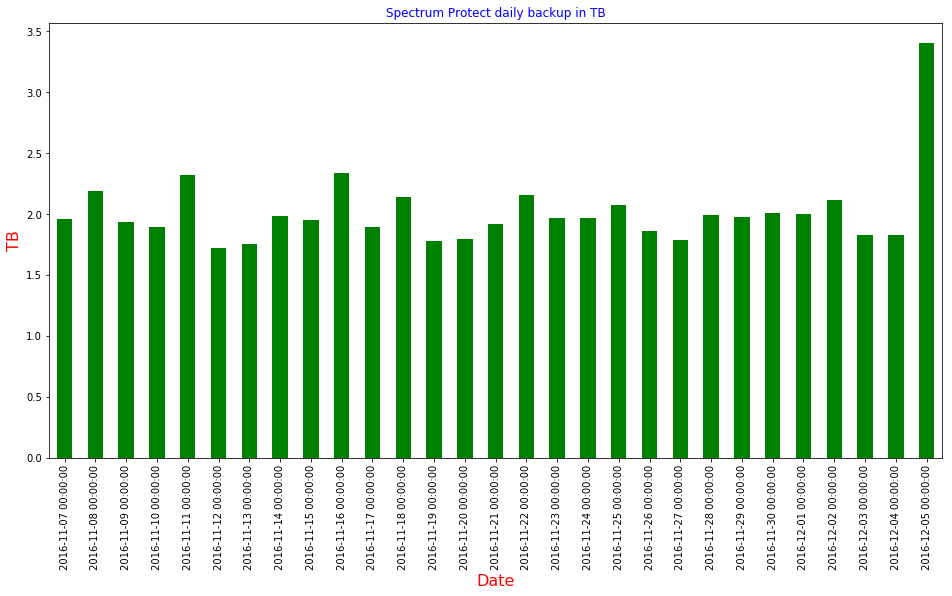

In [18]:
tb_dbkup.plot(kind='bar', color='green' , linewidth=3.0 , figsize=(16,8))

plt.title("Spectrum Protect daily backup in TB", color='blue')
plt.xlabel("Date", fontsize=16, color='red')
plt.ylabel("TB", fontsize=16, color='red')